In [1]:
from keras import Input
from keras.models import Model
from keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D, MaxPooling2D,ZeroPadding2D, Add
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2


Using TensorFlow backend.
C:\Users\hosan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hosan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hosan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hosan\AppData\Roa

In [2]:
# 데이터 로드
(x_trainset, y_trainset), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 레이블 정의
fashion_mnist_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
                        "Sandal",     "Shirt",  "Sneaker", "Bag",  "Ankle boot"]


#학습용과 검증용으로 분리
x_train,y_train,x_val,y_val = train_test_split(x_trainset, y_trainset, train_size=0.1, test_size=0.05, random_state=0)

#데이터 전처리
x_train = x_train / 255.0
y_train = y_train / 255.0

X_train=[]
Y_train=[]

for i in range(0,6000):
    X_train.append(cv2.resize(x_train[i], dsize=(224,224), interpolation=cv2.INTER_LINEAR))

for i in range(0,3000):
    Y_train.append(cv2.resize(y_train[i], dsize=(224,224), interpolation=cv2.INTER_LINEAR))
    
X_train= np.array(X_train)
Y_train = np.array(Y_train)

X_train = X_train[:,:,:, np.newaxis]
X_train = np.tile(X_train, (1,1,1,3))
Y_train = Y_train[:,:,:, np.newaxis]
Y_train = np.tile(Y_train, (1,1,1,3))


In [3]:
input_tensor = Input(shape=(224, 224, 3), dtype='float32', name='input')

def conv1_layer(x):
    x = ZeroPadding2D(padding=(3, 3))(x)
    x = Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)

    return x


def conv2_layer(x):
    x = MaxPooling2D((3, 3), 2)(x)

    shortcut = x

    for i in range(3):
        if (i == 0):
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)

            x = Add()([x, shortcut])
            x = Activation('relu')(x)

            shortcut = x

        else:
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)

            x = Add()([x, shortcut])
            x = Activation('relu')(x)

            shortcut = x

    return x


def conv3_layer(x):
    shortcut = x

    for i in range(4):
        if (i == 0):
            x = Conv2D(128, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(512, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)

            x = Add()([x, shortcut])
            x = Activation('relu')(x)

            shortcut = x

        else:
            x = Conv2D(128, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)

            x = Add()([x, shortcut])
            x = Activation('relu')(x)

            shortcut = x

    return x


def conv4_layer(x):
    shortcut = x

    for i in range(23):
        if (i == 0):
            x = Conv2D(256, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(1024, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(1024, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)

            x = Add()([x, shortcut])
            x = Activation('relu')(x)

            shortcut = x

        else:
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(1024, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)

            x = Add()([x, shortcut])
            x = Activation('relu')(x)

            shortcut = x

    return x


def conv5_layer(x):
    shortcut = x

    for i in range(3):
        if (i == 0):
            x = Conv2D(512, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(2048, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)

            x = Add()([x, shortcut])
            x = Activation('relu')(x)

            shortcut = x

        else:
            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)

            x = Add()([x, shortcut])
            x = Activation('relu')(x)

            shortcut = x

    return x


x = conv1_layer(input_tensor)
x = conv2_layer(x)
x = conv3_layer(x)
x = conv4_layer(x)
x = conv5_layer(x)

x = GlobalAveragePooling2D()(x)
output_tensor = Dense(10, activation='softmax')(x)

resnet101 = Model(input_tensor, output_tensor)
resnet101.summary()


W0819 21:21:55.225024  9780 deprecation_wrapper.py:119] From C:\Users\hosan\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 21:21:55.255549  9780 deprecation_wrapper.py:119] From C:\Users\hosan\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 21:21:55.258540  9780 deprecation_wrapper.py:119] From C:\Users\hosan\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 21:21:55.278544  9780 deprecation_wrapper.py:119] From C:\Users\hosan\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_se

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input[0][0]                      
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 112, 112, 64) 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 112, 112, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation

In [4]:
resnet101.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics =['accuracy'])
#trainning
history = resnet101.fit(X_train, x_val, batch_size=16, validation_data=(Y_train, y_val),epochs=20)

W0819 21:22:14.078498  9780 deprecation_wrapper.py:119] From C:\Users\hosan\AppData\Roaming\Python\Python37\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 21:22:14.221049  9780 deprecation.py:323] From C:\Users\hosan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 6000 samples, validate on 3000 samples
Epoch 1/20
6000/6000 [==============================] - 140s 23ms/step - loss: 1.7109 - acc: 0.5052 - val_loss: 11.8277 - val_acc: 0.1117
Epoch 2/20
6000/6000 [==============================] - 122s 20ms/step - loss: 0.7753 - acc: 0.7238 - val_loss: 0.8868 - val_acc: 0.7213
Epoch 3/20
6000/6000 [==============================] - 121s 20ms/step - loss: 0.6504 - acc: 0.7630 - val_loss: 0.6791 - val_acc: 0.7663
Epoch 4/20
6000/6000 [==============================] - 122s 20ms/step - loss: 0.5516 - acc: 0.8003 - val_loss: 0.5404 - val_acc: 0.7993
Epoch 5/20
6000/6000 [==============================] - 121s 20ms/step - loss: 0.5333 - acc: 0.8033 - val_loss: 2.8043 - val_acc: 0.6273
Epoch 6/20
6000/6000 [==============================] - 121s 20ms/step - loss: 0.4812 - acc: 0.8163 - val_loss: 0.5909 - val_acc: 0.7797
Epoch 7/20
6000/6000 [==============================] - 122s 20ms/step - loss: 0.4501 - acc: 0.8328 - val_loss: 0.4795 - val_acc:

In [7]:
# 테스트 셋을 통해 모델 평가 및 정확도
score = resnet101.evaluate(Y_train, y_val, verbose=1)
print('\n', 'Test accuracy:', score[1])
print('Test loss:', score[0])

3000/3000 [==============================] - 15s 5ms/step

 Test accuracy: 0.8236666666666667
Test loss: 0.5455043040911357


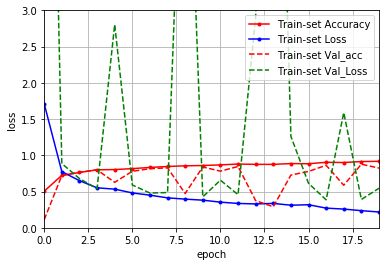

In [10]:
#epochs당 loss 변화 그래프

plt.figure('ResNet101_Fashion_MNIST')

y_acc= history.history['acc']
y_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_acc, marker='.', c='red', label="Train-set Accuracy")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, val_acc, 'r--', label='Train-set Val_acc')
plt.plot(x_len, val_loss, 'g--', label="Train-set Val_Loss")
plt.axis([0,19,0,3])
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
